In [6]:
import os
import numpy as np

from sg2t.io.weather import tmy3
from sg2t.weather import Weather

package_dir = "/Users/smiskov/Documents/SLAC/AED/ALM/slac-gismo-grid-tools"
files_dir = f"{package_dir}/sg2t/weather/data/tmy3/US/"


# import some data using TMY3 module
tmy = tmy3.TMY3()

# pick a weather station
st_10 = tmy.get_index()[150]
print(f"Station {st_10[:-4]}\n")

Station CA-Lemoore_Reeves_Nas.



In [7]:
filename =  files_dir + st_10
filename

'/Users/smiskov/Documents/SLAC/AED/ALM/slac-gismo-grid-tools/sg2t/weather/data/tmy3/US/CA-Lemoore_Reeves_Nas.tmy3'

In [8]:
tmy.get_data(filename).head()

,Date,Time,Temperature,Rel Humidity,ETR,ETRN,GHI,DNI,DHI,GH illum,...,Pressure,Wdir,Wspd,Hvis,CeilHgt,Pwat,AOD,Alb,Lprecip depth,Lprecip quantity
0,1999-01-01,01:00,5.7,92,0,0,0,0,0,0,...,1013,340,2.9,2400,1815,1.0,0.119,0.19,0,1
1,1999-01-01,02:00,5.3,93,0,0,0,0,0,0,...,1013,330,2.8,2400,1617,1.0,0.119,0.19,0,1
2,1999-01-01,03:00,4.9,94,0,0,0,0,0,0,...,1014,320,2.8,2400,1418,0.9,0.119,0.19,0,1
3,1999-01-01,04:00,4.4,96,0,0,0,0,0,0,...,1014,310,2.8,2400,1220,0.9,0.119,0.19,0,1
4,1999-01-01,05:00,4.1,96,0,0,0,0,0,0,...,1014,300,2.7,2400,1022,0.9,0.119,0.19,0,1


In [9]:
tmy.data.head()

,Date,Time,Temperature,Rel Humidity,ETR,ETRN,GHI,DNI,DHI,GH illum,...,Pressure,Wdir,Wspd,Hvis,CeilHgt,Pwat,AOD,Alb,Lprecip depth,Lprecip quantity
0,1999-01-01,01:00,5.7,92,0,0,0,0,0,0,...,1013,340,2.9,2400,1815,1.0,0.119,0.19,0,1
1,1999-01-01,02:00,5.3,93,0,0,0,0,0,0,...,1013,330,2.8,2400,1617,1.0,0.119,0.19,0,1
2,1999-01-01,03:00,4.9,94,0,0,0,0,0,0,...,1014,320,2.8,2400,1418,0.9,0.119,0.19,0,1
3,1999-01-01,04:00,4.4,96,0,0,0,0,0,0,...,1014,310,2.8,2400,1220,0.9,0.119,0.19,0,1
4,1999-01-01,05:00,4.1,96,0,0,0,0,0,0,...,1014,300,2.7,2400,1022,0.9,0.119,0.19,0,1


In [10]:
tmy.units("Temperature")

'degrees C'

# Export to Weather package

In [11]:
w = Weather(data=tmy.data)

No existing metadata found.


In [12]:
# pass metadata
w.metadata = tmy.metadata

## basic plotting

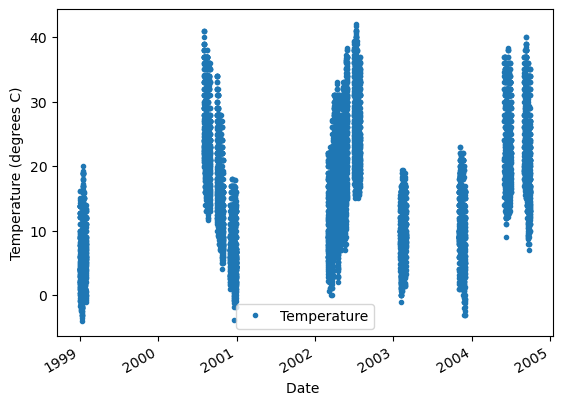

In [15]:
w.plot("Date", "Temperature")

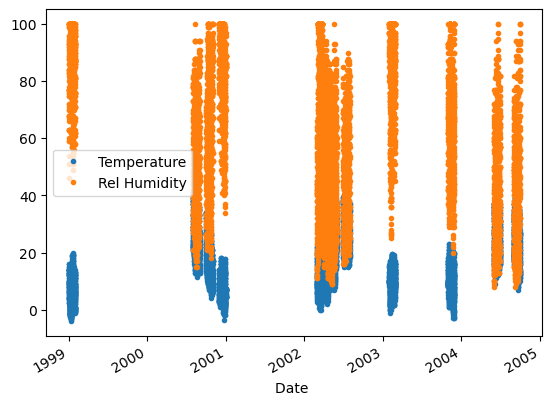

In [13]:
w.plot("Date", ["Temperature", "Rel Humidity"])

## Get head index

In [16]:
w.get_hi()

0       40.510
1       39.765
2       39.020
3       38.124
4       37.530
         ...  
8755    42.161
8756    42.161
8757    42.161
8758    42.161
8759    41.020
Name: Heat Index, Length: 8760, dtype: float64

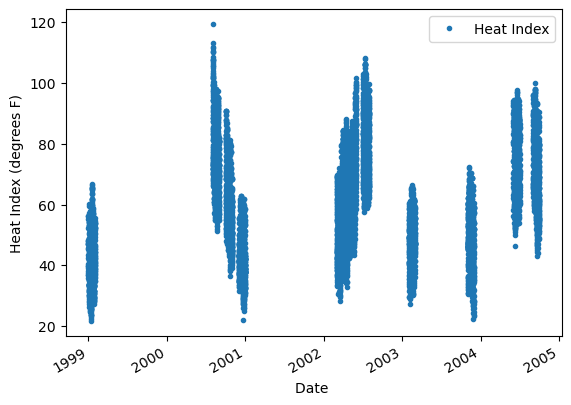

In [18]:
w.plot("Date", "Heat Index")

## note units for HI

In [30]:
w = Weather(data=tmy.data)

No existing metadata found.


In [31]:
w.get_hi()

No metadata to check units. Make sure Temperature is in degrees F. To convert, use Weather.c_to_f method.


0       0.294
1      -0.099
2      -0.492
3      -0.948
4      -1.278
        ...  
8755    1.065
8756    1.065
8757    1.065
8758    1.065
8759    0.452
Name: Heat Index, Length: 8760, dtype: float64

In [33]:
w.metadata = tmy.metadata

In [36]:
w.metadata["col_units"]["Temperature"], w.metadata["col_units"]["Heat Index"]

('degrees C', 'degrees F')

In [37]:
w.get_hi()

0       40.510
1       39.765
2       39.020
3       38.124
4       37.530
         ...  
8755    42.161
8756    42.161
8757    42.161
8758    42.161
8759    41.020
Name: Heat Index, Length: 8760, dtype: float64

## plot certain date range 

In [38]:
start_date = '2001-1-1'
end_date = '2003-6-10'

In [39]:
sub_data = w.between_dates(start_date, end_date, ["Date", "Rel Humidity","Temperature", "Heat Index"])

In [40]:
sub = Weather(sub_data)
sub.metadata = w.metadata

No existing metadata found.


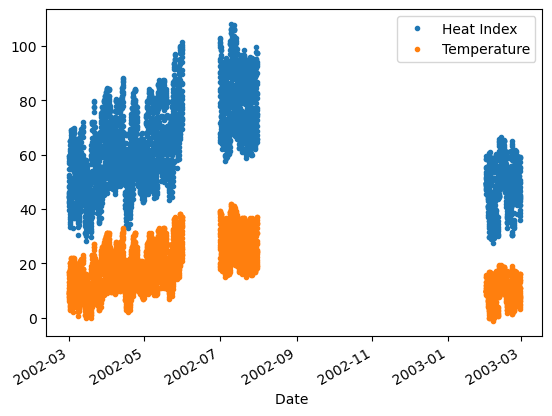

In [41]:
sub.plot("Date", ["Heat Index", "Temperature"])

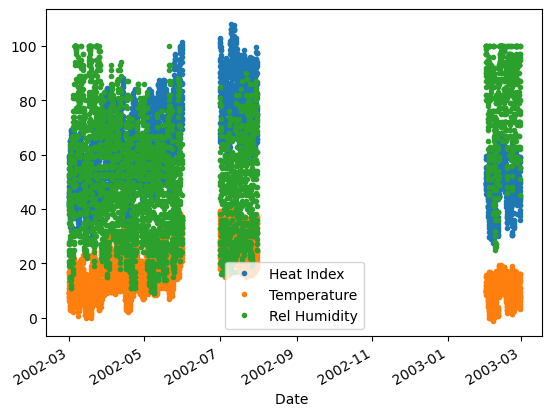

In [42]:
sub.plot("Date", ["Heat Index", "Temperature", "Rel Humidity"])